In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df= pd.read_csv("/content/Comcast_telecom_complaints_data.csv")

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:

df["date_index"] = df["Date_month_year"] + " " + df["Time"]

In [5]:

df["Date_month_year"]=pd.to_datetime(df["Date_month_year"])
df["date_index"]=pd.to_datetime(df["date_index"])



In [6]:
df = df.set_index(df["date_index"])

In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 15:53:50 to 2015-06-24 22:28:33
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  date_in

change dates to date format


Ticket #: Ticket number assigned to each complaint

Customer Complaint: Description of complaint

Date: Date of complaint

Time: Time of complaint

Received Via: Mode of communication of the complaint

City: Customer city

State: Customer state

Zipcode: Customer zip

Status: Status of complaint

Filing on behalf of someone

#  Trend chart for the number of complaints at monthly and daily granularity levels

**daily**

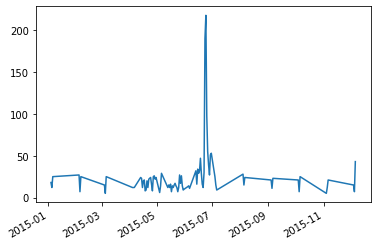

In [8]:
df["Date_month_year"].value_counts().plot()

monthly

In [9]:
month_gruper= df.groupby(pd.Grouper(freq="M")).size()

In [10]:
month_gruper.head()

date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

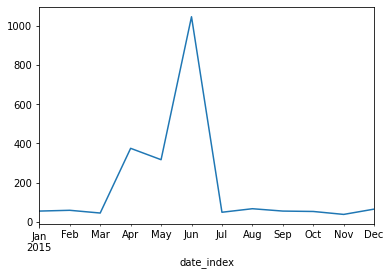

In [11]:

df.groupby(pd.Grouper(freq="M")).size().plot()

**table with the frequency of complaint types.**

In [12]:
df['Customer Complaint'] = df['Customer Complaint'].str.lower() 

In [13]:
df["Customer Complaint"].value_counts()

comcast                                                                          102
comcast data cap                                                                  30
comcast internet                                                                  29
comcast data caps                                                                 21
comcast billing                                                                   18
                                                                                ... 
comcast slowing down                                                               1
comcast blocks hbo go on ps4                                                       1
arbitrary price increase                                                           1
denial of comcast business (phone and internet) service to my dental practice      1
comcast internet data cap lies                                                     1
Name: Customer Complaint, Length: 1740, dtype: int64

**Internet had the the highest number of complaints**

In [14]:
import nltk


In [15]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

In [16]:
stop_word_set=set(STOPWORDS)

In [17]:
remove_list = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')


In [18]:
for words in remove_list:
    stop_word_set.add(words)

In [19]:
wordcloud = WordCloud(stopwords=stop_word_set,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

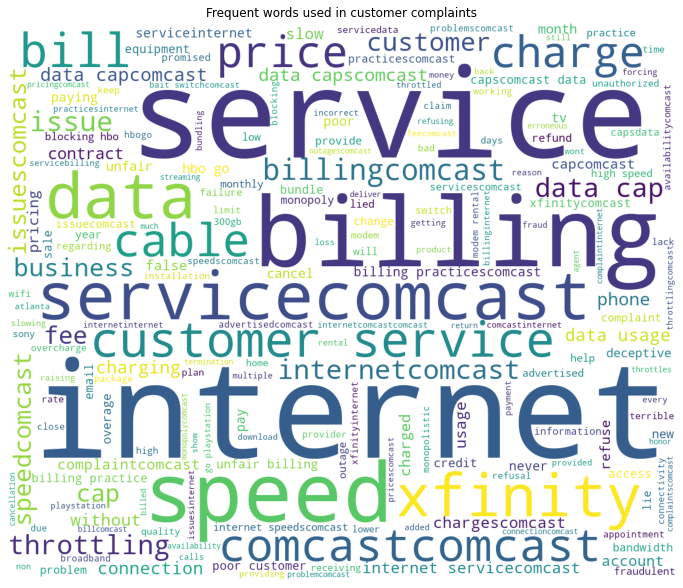

In [20]:
plt.figure( figsize=(12,18) )
plt.imshow(wordcloud)
plt.title('Frequent words used in customer complaints')
plt.axis('off')
plt.show()

**From wordcloud it is clear internet is the most common complaints**

#  new categorical variable with value as Open and Closed.

In [21]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
df["IsClosed"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

# **state wise status of complaints in a stacked bar chart**

In [23]:
df['State'] = df['State'].str.upper() 
st_status = df.groupby(['State','IsClosed']).size().unstack().fillna(0)

In [24]:
st_status['Total']=st_status['Closed']+st_status['Open']

In [25]:
st_status.sort_values(ascending=False,by='Total').head()

IsClosed,Closed,Open,Total
State,,,
GEORGIA,208.0,80.0,288.0
FLORIDA,201.0,39.0,240.0
CALIFORNIA,159.0,61.0,220.0
ILLINOIS,135.0,29.0,164.0
TENNESSEE,96.0,47.0,143.0


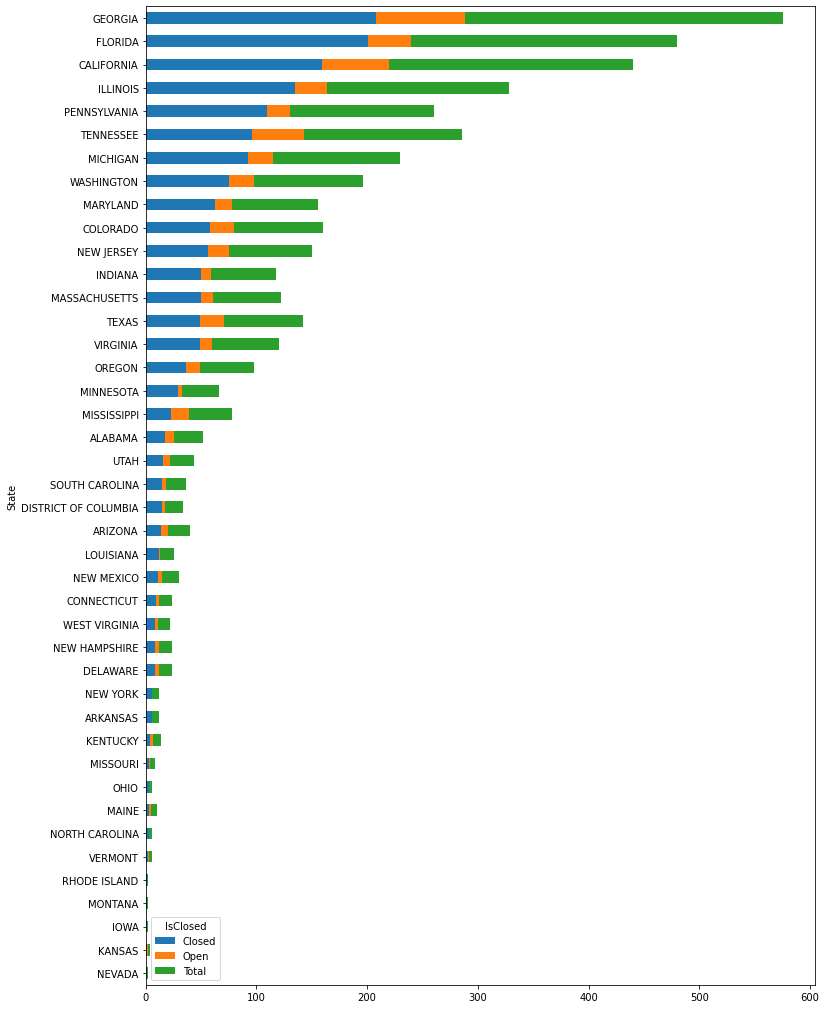

In [26]:
st_status.sort_values('Closed',ascending=True).plot(kind="barh", figsize=(12,18), stacked=True)

**Georgia has the highest number of complaints i.e:288**



In [27]:
st_status['Percentage']=(st_status['Open']/st_status['Total'])*100

In [28]:
st_status.sort_values(ascending=False,by='Percentage').head()

IsClosed,Closed,Open,Total,Percentage
State,,,,
KANSAS,1.0,1.0,2.0,50.000000
KENTUCKY,4.0,3.0,7.0,42.857143
MISSISSIPPI,23.0,16.0,39.0,41.025641
MAINE,3.0,2.0,5.0,40.000000
ALABAMA,17.0,9.0,26.0,34.615385


**Percentage wise kansas has the highest number of unresolved cases but in the hindsight Mississippi is the one that  should be concerned about**

# percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [29]:
comp = df.groupby(['Received Via','IsClosed']).size().unstack().fillna(0)

In [30]:
comp

IsClosed,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [33]:
comp['resolved'] = (comp['Closed']/(comp['Closed']+comp['Open']))*100

In [34]:
comp['resolved']

Received Via
Customer Care Call    77.211796
Internet              76.289593
Name: resolved, dtype: float64